## Visualize Data

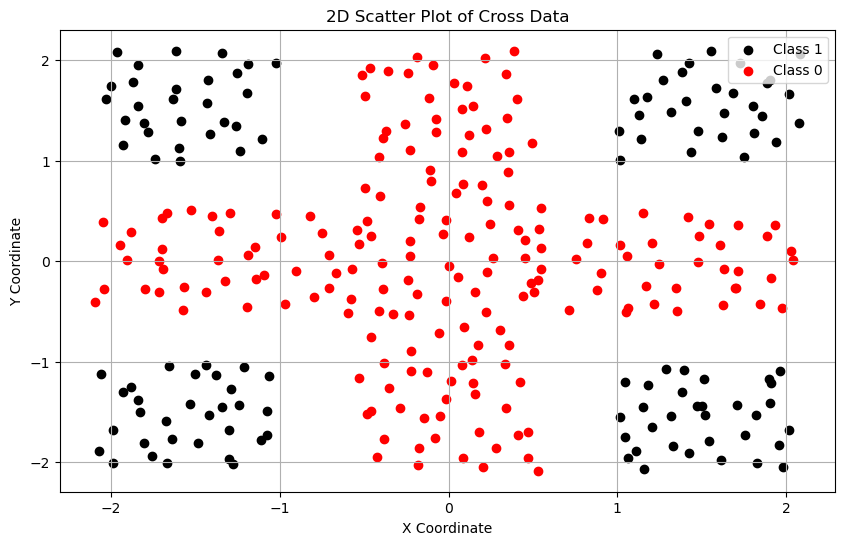

In [2]:
import matplotlib.pyplot as plt
import csv

# Initialize lists to hold the data
x_coords = []
y_coords = []
labels = []

# Read the CSV file
with open('data/cross_data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        x_coords.append(float(row[0]))
        y_coords.append(float(row[1]))
        labels.append(int(row[2]))

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot data points with different colors based on labels
for x, y, label in zip(x_coords, y_coords, labels):
    if label == 0:
        plt.scatter(x, y, color='red', label='Class 0' if 'Class 0' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(x, y, color='black', label='Class 1' if 'Class 1' not in plt.gca().get_legend_handles_labels()[1] else "")

# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Scatter Plot of Cross Data')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()